# 得出结论
使用下列空间来处理数据集`clean_08.csv` 和`clean_18.csv`中的以下问题

In [2]:
# load datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

### Q1: 是否有更多使用替代燃料来源的独特(unique)模式(model)？ 具体多少？

In [4]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [5]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [12]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

+ 表示and,使用"&"，表示or,使用"|"

In [25]:
df_08[(df_08.fuel == "ethanol")| (df_08.fuel == "CNG")].model.nunique()

2

In [24]:
df_08.query('fuel in ["CNG","ethanol"]').model.nunique()

2

+ 可以使用.isin()进行成员判断

In [37]:
df_08[df_08.fuel.isin(["CNG","ethanol"])].model.nunique()

2

In [19]:
df_18[(df_18.fuel == "Ethanol")| (df_18.fuel == "Electricity")].model.nunique()

26

In [30]:
df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique()

26

In [36]:
df_18[df_18.fuel.isin(["Electricity","Ethanol"])].model.nunique()

26

In [31]:
alt_08 = df_08[(df_08.fuel == "ethanol")| (df_08.fuel == "CNG")].model.nunique()
alt_18 = df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique()
alt_18

26

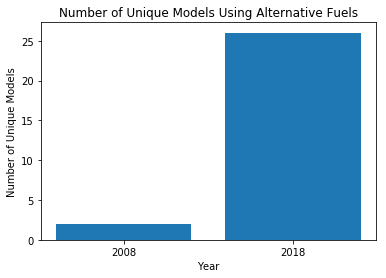

In [32]:
plt.bar(["2008","2018"],[alt_08,alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [41]:
total_model_08 = df_08.model.nunique()
total_model_18 = df_18.model.nunique()
proportion_08 = alt_08/total_model_08
proportion_18 = alt_18/total_model_18

Text(0,0.5,'proportion of unique models')

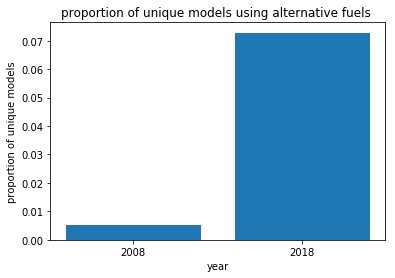

In [43]:
plt.bar(["2008","2018"],[proportion_08,proportion_18])
plt.title("proportion of unique models using alternative fuels ")
plt.xlabel("year")
plt.ylabel("proportion of unique models")

### Q2: 车辆级别在燃油经济性方面有多少改进？


In [44]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [47]:
cmb_mpg_mean_08 = df_08.groupby("veh_class").cmb_mpg.mean()
cmb_mpg_mean_18 = df_18.groupby("veh_class").cmb_mpg.mean()

In [48]:
imprv_cmb_mpg = cmb_mpg_mean_18-cmb_mpg_mean_08
imprv_cmb_mpg

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [50]:
imprv_cmb_mpg.dropna(inplace=True)
imprv_cmb_mpg

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

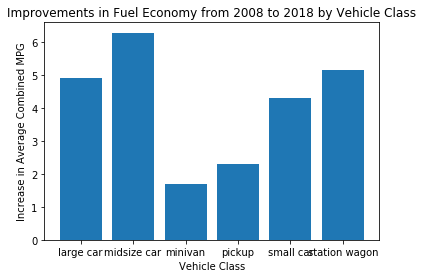

In [51]:
plt.bar(imprv_cmb_mpg.index,imprv_cmb_mpg)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: SmartWay 车辆的特点是什么？ 它们是否随着时间而改变？

In [53]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [55]:
df_08[df_08.smartway == "yes"].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [56]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [57]:
df_18[df_18.smartway.isin(["Yes","Elite"])].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000



### Q4: 哪些功能与更好的燃油经济性有关？

In [59]:
better_08 = df_08[df_08["cmb_mpg"]>df_08.cmb_mpg.mean()]
better_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [62]:
better_18 = df_18.query("cmb_mpg > cmb_mpg.mean()")
better_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
